출처 : https://datascienceschool.net/view-notebook/83d5e4fff7d64cb2aecfd7e42e1ece5e/

# 정규화 선형회귀

정규화(regularized) 선형회귀 방법은 선형회귀 계수(weight)에 대한 제약 조건을 추가함으로써 모형이 과도하게 최적화되는 현상, 즉 과최적화를 막는 방법이다.

- Ridge 회귀모형
- Lasso 회귀모형
- Elastic Net 회귀모형

### 1) Ridge 회귀모형¶
Ridge 회귀모형에서는 가중치들의 제곱합(squared sum of weights)을 최소화하는 것을 추가적인 제약 조건으로 한다.

$$ w = arg\min_{w}(\sum_{i=1}^N e^2_i + \lambda\sum_{j=1}^{M}w^2_j)$$
 
λ 는 기존의 잔차 제곱합과 추가적 제약 조건의 비중을 조절하기 위한 하이퍼 모수(hyper parameter)이다.  λ 가 크면 정규화 정도가 커지고 가중치의 값들이 작아진다.  λ 가 작아지면 정규화 정도가 작아지며  λ  가 0이 되면 일반적인 선형 회귀모형이 된다.

### 2) Lasso 회귀모형¶
Lasso(Least Absolute Shrinkage and Selection Operator) 회귀모형은 가중치의 절대값의 합을 최소화하는 것을 추가적인 제약 조건으로 한다.

$$ w = arg\min_{w}(\sum_{i=1}^N e^2_i + \lambda\sum_{j=1}^{M}|w_j|)$$
 
### 3) Elastic Net 회귀모형¶
Elastic Net 회귀모형은 가중치의 절대값의 합과 제곱합을 동시에 제약 조건으로 가지는 모형이다.

$$ w = arg\min_{w}(\sum_{i=1}^N e^2_i + \lambda_1\sum_{j=1}^{M}w^2_j+ \lambda_2\sum_{j=1}^{M}|w_j|)$$
 
λ1 ,  λ2  두 개의 하이퍼 모수를 가진다.


### 4) statsmodels의 정규화 회귀모형¶
statsmodels 패키지는 OLS 선형 회귀모형 클래스의 fit_regularized 메서드를 사용하여 Elastic Net 모형 계수를 구할 수 있다.

http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.fit_regularized.html

하이퍼 모수는 다음과 같이 모수  alpha  와  L1_wt  로 정의된다.

$$ 0.5 \times \frac{RSS}{N} + alpha \times (0.5 \times (1-L1\_wt)\sum w^2_i + L1\_wt \sum |w_i|)$$

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# 1. 실습 

### 1) 데이터 생성

In [6]:
def make_nonlinear(seed=0):
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)


X, y = make_nonlinear()
dfX = pd.DataFrame(X, columns=["x"])
dfX = sm.tools.tools.add_constant(dfX)
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)

C:\Users\jsh\Anaconda3\envs\tens2\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 2) 일반 회귀분석

In [12]:
model = sm.OLS.from_formula(
    "y ~ x + I(x**2) + I(x**3) + I(x**4) + I(x**5) + I(x**6) + I(x**7) + I(x**8) + I(x**9)", data=df)
result1 = model.fit()
result1.params

Intercept       -0.169863
x               25.735773
I(x ** 2)     -428.141684
I(x ** 3)     3866.723115
I(x ** 4)   -18340.939667
I(x ** 5)    49326.072553
I(x ** 6)   -78884.743085
I(x ** 7)    74538.645164
I(x ** 8)   -38453.132196
I(x ** 9)     8350.254987
dtype: float64

C:\Users\jsh\Anaconda3\envs\tens2\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


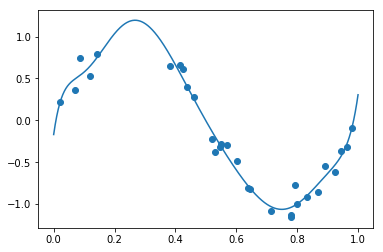

In [13]:
# 그래프 그리기
def plot_statsmodels(result):
    plt.scatter(X, y) # 점 그래프
    xx = np.linspace(0, 1, 1000)
    dfxx = pd.DataFrame(xx, columns=["x"])
    dfxx = sm.add_constant(dfxx)
    plt.plot(xx, result.predict(dfxx).values) # 선 그래프, 회귀분석 결과
    plt.show()


plot_statsmodels(result1)

### 2) Ridge 모형

fit_regularized 메소드 사용 <br>
alpha 는 하이퍼파라미터<br>
L1_wt=0

[ 0.63308745 -0.75705866 -1.07056551 -0.76835135 -0.35530367  0.0121939
  0.29917825  0.50969248  0.65793698  0.75851865]


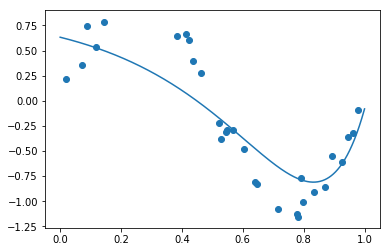

In [14]:
result2 = model.fit_regularized(alpha=0.01, L1_wt=0)
print(result2.params)
plot_statsmodels(result2)

### 3) Lasso 모형 

Intercept    0.687949
x           -1.129134
I(x ** 2)   -1.124878
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.281484
I(x ** 9)    1.075281
dtype: float64


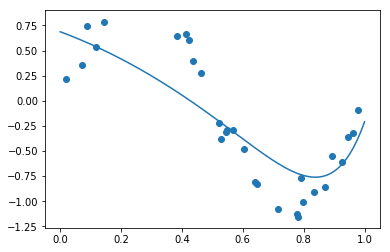

In [15]:
result3 = model.fit_regularized(alpha=0.01, L1_wt=1)
print(result3.params)
plot_statsmodels(result3)

### 3) Elastic net 모형 

Intercept    0.656203
x           -0.849745
I(x ** 2)   -1.262902
I(x ** 3)   -0.425687
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.304049
I(x ** 8)    0.631908
I(x ** 9)    0.801206
dtype: float64


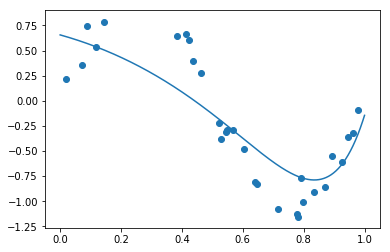

In [16]:
result4 = model.fit_regularized(alpha=0.01, L1_wt=0.5)
print(result4.params)
plot_statsmodels(result4)